In [8]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.ar_model import AR, ARResults

In [3]:
df = pd.read_csv('../Data/uspopulation.csv',index_col= 'DATE', parse_dates=True)

In [4]:
df.index.freq = 'MS'

In [5]:
df.head()

,PopEst
DATE,
2011-01-01,311037
2011-02-01,311189
2011-03-01,311351
2011-04-01,311522
2011-05-01,311699


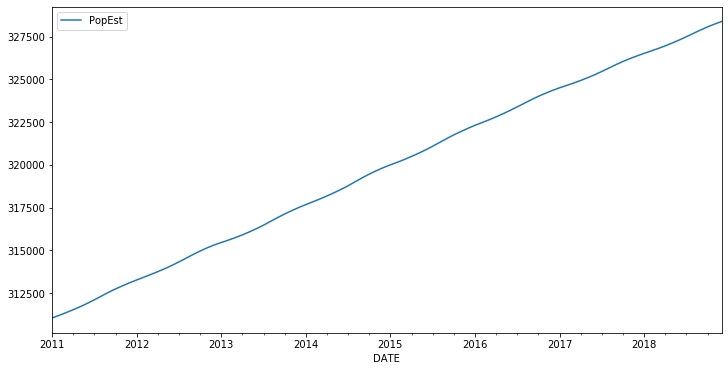

In [9]:
df.plot(figsize=(12,6))

In [11]:
train = df.iloc[:84]
test = df.iloc[84:]

In [12]:
model = AR(train['PopEst'])

In [13]:
AR1fit = model.fit(maxlag=1)

In [14]:
start = len(train)

In [18]:
end = len(train) + len(test)-1

In [19]:
AR1fit.predict(start=start, end=end)

2018-01-01    326560.403377
2018-02-01    326742.749463
2018-03-01    326925.038278
2018-04-01    327107.269838
2018-05-01    327289.444162
2018-06-01    327471.561268
2018-07-01    327653.621173
2018-08-01    327835.623896
2018-09-01    328017.569455
2018-10-01    328199.457868
2018-11-01    328381.289152
2018-12-01    328563.063326
Freq: MS, dtype: float64

In [20]:
test

,PopEst
DATE,
2018-01-01,326527
2018-02-01,326669
2018-03-01,326812
2018-04-01,326968
2018-05-01,327134
2018-06-01,327312
2018-07-01,327502
2018-08-01,327698
2018-09-01,327893


In [21]:
predictions1 = AR1fit.predict(start=start,end=end)

In [22]:
predictions1 = predictions1.rename('AR(1)')

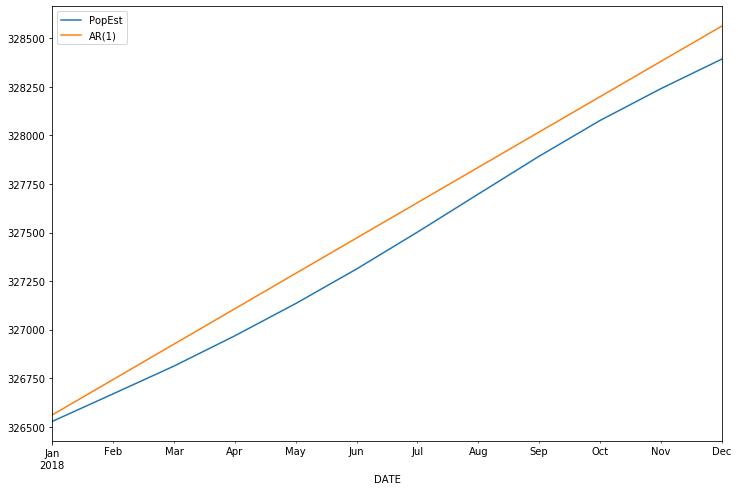

In [24]:
test.plot(figsize=(12,8))
predictions1.plot(legend=True)

In [25]:
AR2fit = model.fit(maxlag=2)

In [26]:
AR2fit.params

const        137.368305
L1.PopEst      1.853490
L2.PopEst     -0.853836
dtype: float64

In [27]:
predictions2 = AR2fit.predict(start,end)

In [28]:
predictions2 = predictions2.rename('AR(2)')

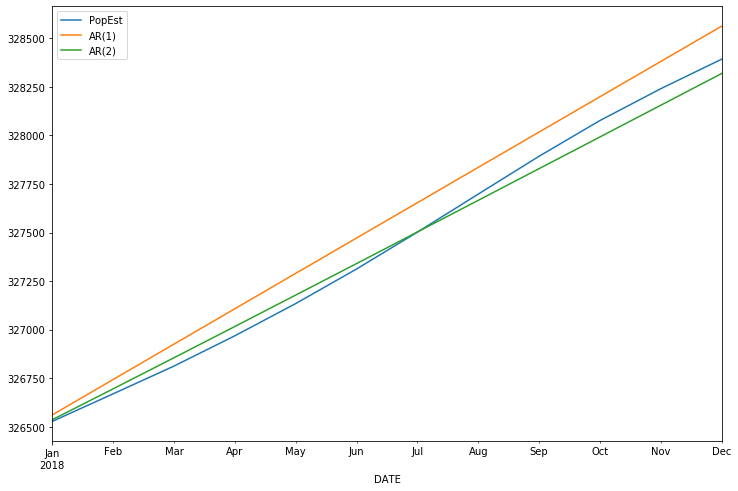

In [30]:
test.plot(figsize=(12,8))
predictions1.plot(legend=True)
predictions2.plot(legend=True)

In [31]:
ARfit = model.fit(ic='t-stat')

In [32]:
ARfit.params

const        82.309677
L1.PopEst     2.437997
L2.PopEst    -2.302100
L3.PopEst     1.565427
L4.PopEst    -1.431211
L5.PopEst     1.125022
L6.PopEst    -0.919494
L7.PopEst     0.963694
L8.PopEst    -0.439511
dtype: float64

In [36]:
prediction8 = ARfit.predict(start,end)
prediction8 = prediction8.rename('AR(8)')

In [33]:
from sklearn.metrics import mean_squared_error

In [34]:
labels = ['AR1','AR2','AR8']

In [37]:
preds = [predictions1,predictions2,prediction8]

In [38]:
for i in range(3):
    error = mean_squared_error(test['PopEst'],preds[i])
    print(f'{labels[i]} MSE was: {error}')

AR1 MSE was: 17449.714237833407
AR2 MSE was: 2713.258683668394
AR8 MSE was: 186.97263605698208


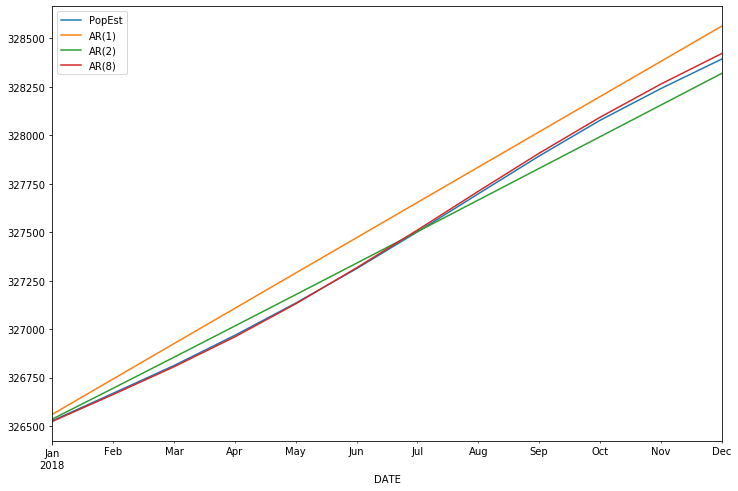

In [39]:
test.plot(figsize=(12,8))
predictions1.plot(legend=True)
predictions2.plot(legend=True)
prediction8.plot(legend=True)

In [49]:
model = AR(df['PopEst'])
ARfit = model.fit()
forcasted_values = ARfit.predict(start= len(df),end=len(df)+12).rename('Forecast')


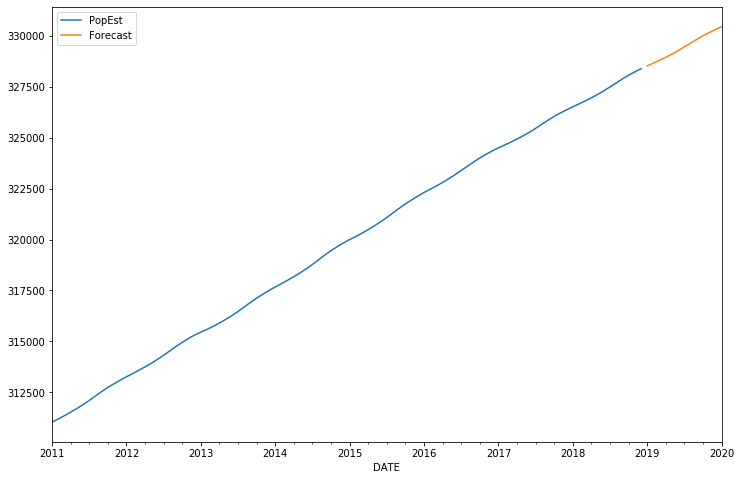

In [50]:
df['PopEst'].plot(figsize=(12,8),legend=True)
forcasted_values.plot(legend=True)

In [51]:
forcasted_values

2019-01-01    328537.420468
2019-02-01    328673.215505
2019-03-01    328810.443249
2019-04-01    328957.592978
2019-05-01    329117.335968
2019-06-01    329289.277307
2019-07-01    329470.144351
2019-08-01    329655.073727
2019-09-01    329839.483148
2019-10-01    330015.435141
2019-11-01    330175.676197
2019-12-01    330322.580416
2020-01-01    330459.617617
Freq: MS, Name: Forecast, dtype: float64